In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('C:\\Users\\DELL\\Desktop\\Machine-Learning\\Lesson-3-Supervised-Learning-Classification\\kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


# Exploratory Data Analysis

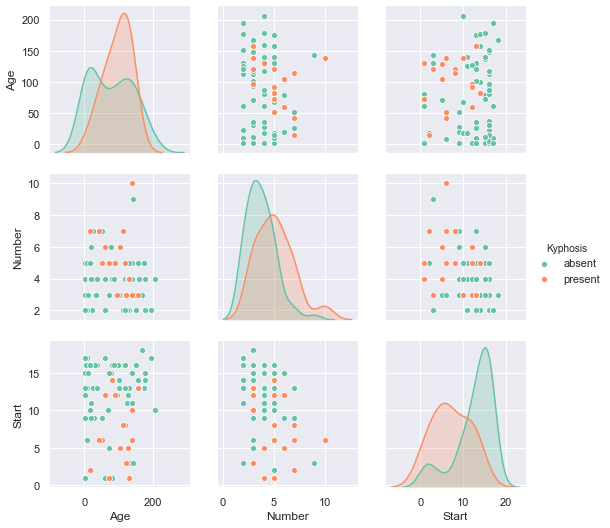

In [6]:
sns.pairplot(df,hue='Kyphosis',palette='Set2')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X=df.drop(['Kyphosis'],axis=1)

In [9]:
y=df['Kyphosis']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [12]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
pred=clf.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

cm =confusion_matrix(y_test,pred)

In [15]:
print(cm)

[[11  6]
 [ 4  4]]


In [16]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.73      0.65      0.69        17
     present       0.40      0.50      0.44         8

    accuracy                           0.60        25
   macro avg       0.57      0.57      0.57        25
weighted avg       0.63      0.60      0.61        25



In [17]:
!pip install pydot

  Using cached https://files.pythonhosted.org/packages/33/d1/b1479a770f66d962f545c2101630ce1d5592d90cb4f083d38862e93d16d2/pydot-1.4.1-py2.py3-none-any.whl


In [18]:
!pip install graphviz

  Using cached https://files.pythonhosted.org/packages/f5/74/dbed754c0abd63768d3a7a7b472da35b08ac442cf87d73d5850a6f32391e/graphviz-0.13.2-py2.py3-none-any.whl


In [19]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features=list(df.columns[1:])
features

F:\anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['Age', 'Number', 'Start']

In [20]:
dot_data=StringIO()

In [21]:
export_graphviz(clf,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())


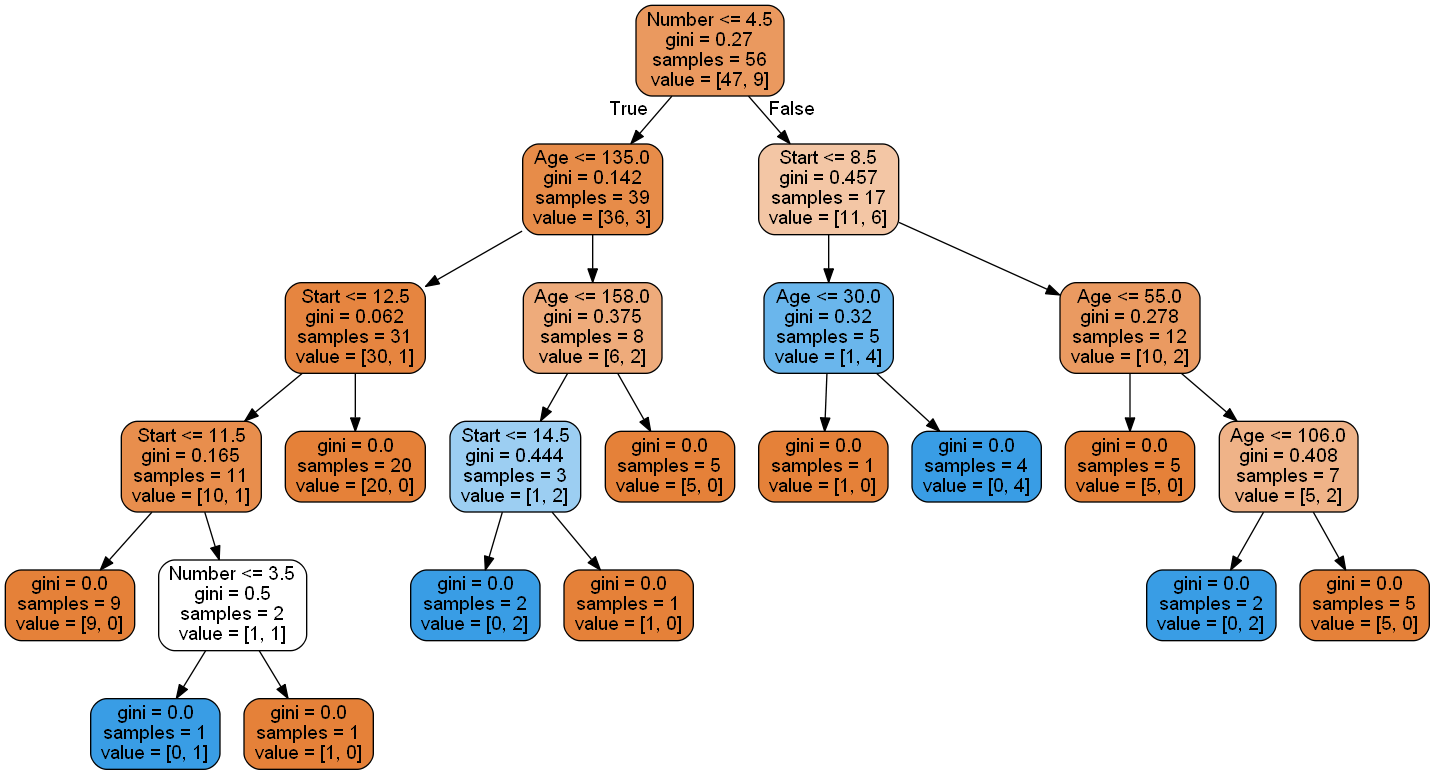

In [23]:
Image(graph[0].create_png())

# Done!